In [14]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

# Machine Learning / Time Series
from scipy import stats
import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer
from IPython.display import Image, display

# Snowflake & ETC
import datetime
import copy

In [15]:
def add_dist_col(df,dog_name):

    # this function will return 5 dogs that are similar with input_dog
    # also return the longest distance from the input dog data point
    df = copy.deepcopy(df)
    dist_list = []
    base = df.loc[dog_name].values
    
    for i in range(df.shape[0]):
        dist_list.append(np.linalg.norm(base - df.iloc[i].values))
    
    df['dist'] = dist_list
    df = df.sort_values(by = 'dist')
    # similarity rate will range from 0 to 1
    df['simliarity_rate'] = 1 - (df['dist'] / df['dist'].values[-1])
    
    return df.head(5)

def euclidean_by_name(df_similiar_dogs):
    name_list = list(df_similiar_dogs.index)
    similarity_list = list(df_similiar_dogs.simliarity_rate)
    for name,s_rate in zip(name_list,similarity_list):
        print(format(s_rate,'.2%'), "simliar to", name)
        display(Image(filename=f'img/{name}.jpg'))

In [16]:
df = pd.read_csv("dog_data_clean.csv", index_col= [0])
df = df.reset_index(drop=True)

In [17]:
df.columns

Index(['dog', 'height', 'weight', 'life', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Coat Length',
       'Openness To Strangers', 'Playfulness Level',
       'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'popularity_rank', 'color', 'marking',
       'health', 'grooming', 'excercise', 'training', 'nutrition', 'temp',
       'black_color', 'white_color', 'red_color', 'Coat Type_double',
       'Coat Type_others', 'Coat Type_smooth', 'bmi'],
      dtype='object')

In [18]:
df = df.set_index('dog')

In [19]:
df = df.drop(['color','health','grooming','excercise','training','nutrition'], axis = 1)

In [20]:
# Normalize df, so that all the columns will have value from 0 to 1
df=(df-df.min())/(df.max()-df.min())

In [28]:
personality = ['Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs',
       'Openness To Strangers', 'Playfulness Level',
       'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs']

apperance = ['height', 'weight', 'bmi', 'life', 'Shedding Level',
       'Coat Grooming Frequency',  'Coat Length', 'marking']

df_custom = df[apperance]

In [ ]:
df.index

In [ ]:
for j,i in enumerate(df.index):
    print("--------------------------")
    print(i)
    df_similiar_dogs= add_dist_col(df_custom,i)
    euclidean_by_name(df_similiar_dogs)
    if i == 50:
        break

# custom

In [ ]:
df[df.index == 'australian-stumpy-tail-cattle-dog']

In [22]:
df[df.index == 'australian-cattle-dog']

,height,weight,life,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Length,...,popularity_rank,marking,temp,black_color,white_color,red_color,Coat Type_double,Coat Type_others,Coat Type_smooth,bmi
dog,,,,,,,,,,,,,,,,,,,,,
australian-cattle-dog,0.490196,0.197368,0.652174,0.5,0.5,0.5,0.5,0.0,0.0,0.0,...,0.253807,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.268166


100.00% simliar to australian-cattle-dog


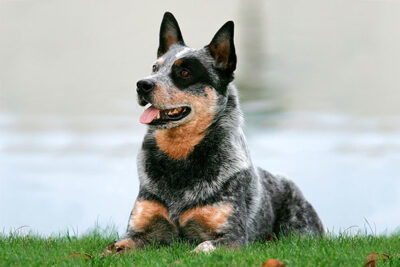

96.34% simliar to stabyhoun


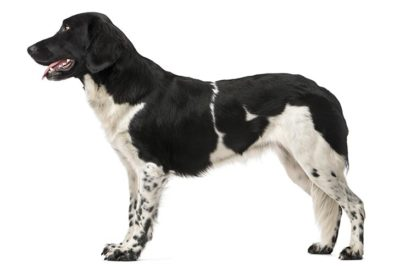

95.14% simliar to portuguese-pointer


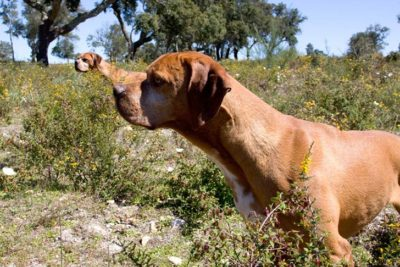

94.27% simliar to american-leopard-hound


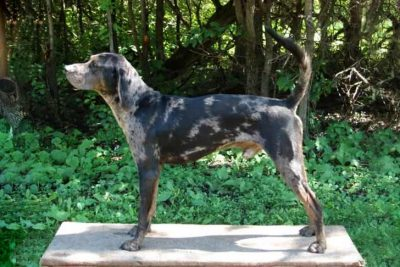

94.09% simliar to german-pinscher


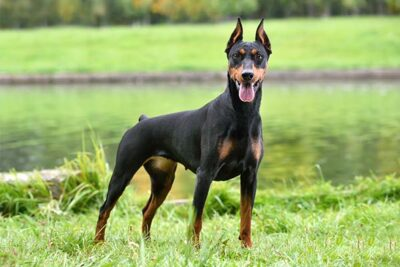

In [29]:
euclidean_by_name(add_dist_col(df_custom,'australian-cattle-dog'))